# WaveNet
WaveNet is a deep-learning based generative model for raw audio developed by Google DeepMind. The main objective of WaveNet is to generate new samples from the original distribution of data. Hence, it is known as a Generative Model.
WaveNet is like a language model from NLP.
The building blocks of WaveNet are convolutional layers.

## Training
This is a many-to-one problem where the input is a sequence of amplitude values and the output is the subsequent value.
WaveNet takes the chunk of raw audio as the input. Raw audio refers to the representation of a wave in the time series domain. In the time series domain, an audio wave is represented in the form of amplitudinal values which are recorded at different intervals of time.

## Inference
1. Select a random array of sample values as a starting point for the model
2. The model outputs a probability distribution over all the samples
3. Choose the value with the maximum probability and append it to the array of samples
4. Delete the first element and pass the array as input for the next iteration
5. Repeat steps 2 to 4

In [1]:
# imports
from music21 import *
import numpy as np
import random
import os
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

## Read the midi files

In [2]:
# read midi file
def read_midi(file):
    print("Loading music file: ", file)

    notes = []
    notes_to_parse = None

    midi = converter.parse(file)
    
    # group based on instrument
    s2 = instrument.partitionByInstrument(midi)
    
    for part in s2.parts:
        if "Piano" not in str(part):
            continue

        notes_to_parse = part.recurse()
        
        for element in notes_to_parse:
            # note
            if isinstance(element, note.Note):
                notes.append(str(element.pitch))

            # chord
            elif isinstance(element, chord.Chord):
                notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

## Load the MIDI files

In [3]:
path = "./training_music/all/"
files = [i for i in os.listdir(path) if i.endswith(".mid")]
notes_array_ = [read_midi(path + i) for i in files]
typ = type(notes_array_[0])
notes_array = np.array(notes_array_, dtype=typ)

Loading music file:  ./training_music/all/12DaysOfChristmas.mid
Loading music file:  ./training_music/all/2001ASpaceOddysey.mid
Loading music file:  ./training_music/all/21Guns.mid
Loading music file:  ./training_music/all/AddamsFamily.mid
Loading music file:  ./training_music/all/AdventureofaLifetime(RadioEdit).mid
Loading music file:  ./training_music/all/Africa.mid
Loading music file:  ./training_music/all/AfterDark.mid
Loading music file:  ./training_music/all/AllAboutThatBass.mid
Loading music file:  ./training_music/all/AllIWantForChristmasIsYou.mid
Loading music file:  ./training_music/all/AmericanIdiot.mid
Loading music file:  ./training_music/all/AmericanLife.mid
Loading music file:  ./training_music/all/AmericanPie.mid
Loading music file:  ./training_music/all/AMessage.mid
Loading music file:  ./training_music/all/AndILoveHer.mid
Loading music file:  ./training_music/all/Animals.mid
Loading music file:  ./training_music/all/AnotherBrickInTheWall.mid
Loading music file:  ./tra

C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=14, channel=None, data=b'Copyright \xa91998'>; getting generic Instrument
  warnings.warn(


Loading music file:  ./training_music/all/ItsMyLife.mid
Loading music file:  ./training_music/all/IWalkTheLine.mid
Loading music file:  ./training_music/all/JamesBond.mid
Loading music file:  ./training_music/all/JarOfHearts.mid
Loading music file:  ./training_music/all/Julia.mid
Loading music file:  ./training_music/all/JustDance.mid
Loading music file:  ./training_music/all/JustLikeAPill.mid
Loading music file:  ./training_music/all/JustTheWayYouAre.mid
Loading music file:  ./training_music/all/JustTheWayyouAre.withLyric.mid
Loading music file:  ./training_music/all/KnockingOnHeavensDoor.mid
Loading music file:  ./training_music/all/LadyInMyLife.mid
Loading music file:  ./training_music/all/LadyIsAVampire.mid
Loading music file:  ./training_music/all/LetHerGo.mid
Loading music file:  ./training_music/all/LetItGoFrozen.mid
Loading music file:  ./training_music/all/LetMeBeTheOne.mid
Loading music file:  ./training_music/all/LetsDance.mid
Loading music file:  ./training_music/all/LetsGe

C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=1, channel=None, data=b'\xa9 Midi-World <http://muziek.clubs.nl/midi-world>'>; getting generic Instrument
  warnings.warn(


Loading music file:  ./training_music/all/P.I.M.P..mid
Loading music file:  ./training_music/all/Paradise.mid
Loading music file:  ./training_music/all/PartyInTheUSA.mid
Loading music file:  ./training_music/all/Payphone.mid
Loading music file:  ./training_music/all/Perfect.mid
Loading music file:  ./training_music/all/PianoMan.mid
Loading music file:  ./training_music/all/PinkPanther.mid
Loading music file:  ./training_music/all/PokerFace.mid
Loading music file:  ./training_music/all/ReallyDontCare.mid
Loading music file:  ./training_music/all/Ride-21pilots.mid
Loading music file:  ./training_music/all/RightThere.mid
Loading music file:  ./training_music/all/RingOfFire.mid
Loading music file:  ./training_music/all/Roar.mid
Loading music file:  ./training_music/all/Rocky.mid
Loading music file:  ./training_music/all/Rollinginthedeep.mid
Loading music file:  ./training_music/all/Rude.mid
Loading music file:  ./training_music/all/RudeBoy.mid
Loading music file:  ./training_music/all/Sail

C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'So This Is Xmas\xff\xff Popular Song\r'>; getting generic Instrument
  warnings.warn(


Loading music file:  ./training_music/all/SoWhat.mid
Loading music file:  ./training_music/all/SoYesterday.mid
Loading music file:  ./training_music/all/Spin.mid
Loading music file:  ./training_music/all/SpongBobSquarPantsTheme.mid
Loading music file:  ./training_music/all/StandByMe.mid
Loading music file:  ./training_music/all/StayWithMe.mid
Loading music file:  ./training_music/all/StepByStep.mid
Loading music file:  ./training_music/all/StillGotTheBlues.mid
Loading music file:  ./training_music/all/StingInTheTail.mid
Loading music file:  ./training_music/all/StoryOfMyLife.mid
Loading music file:  ./training_music/all/Sugar.mid
Loading music file:  ./training_music/all/SultansOfSwing.mid
Loading music file:  ./training_music/all/Superman.mid
Loading music file:  ./training_music/all/SuperMarioBrothers.mid
Loading music file:  ./training_music/all/Sway.mid
Loading music file:  ./training_music/all/SweetChildOfMine.mid
Loading music file:  ./training_music/all/SweetestGoodbye.mid
Loadi

## Understand the data

In [81]:
notes_ = [element for note_ in notes_array for element in note_]
unique_notes = list(set(notes_))
print(len(unique_notes))

862


Text(0.5, 0, 'Frequency of occurence')

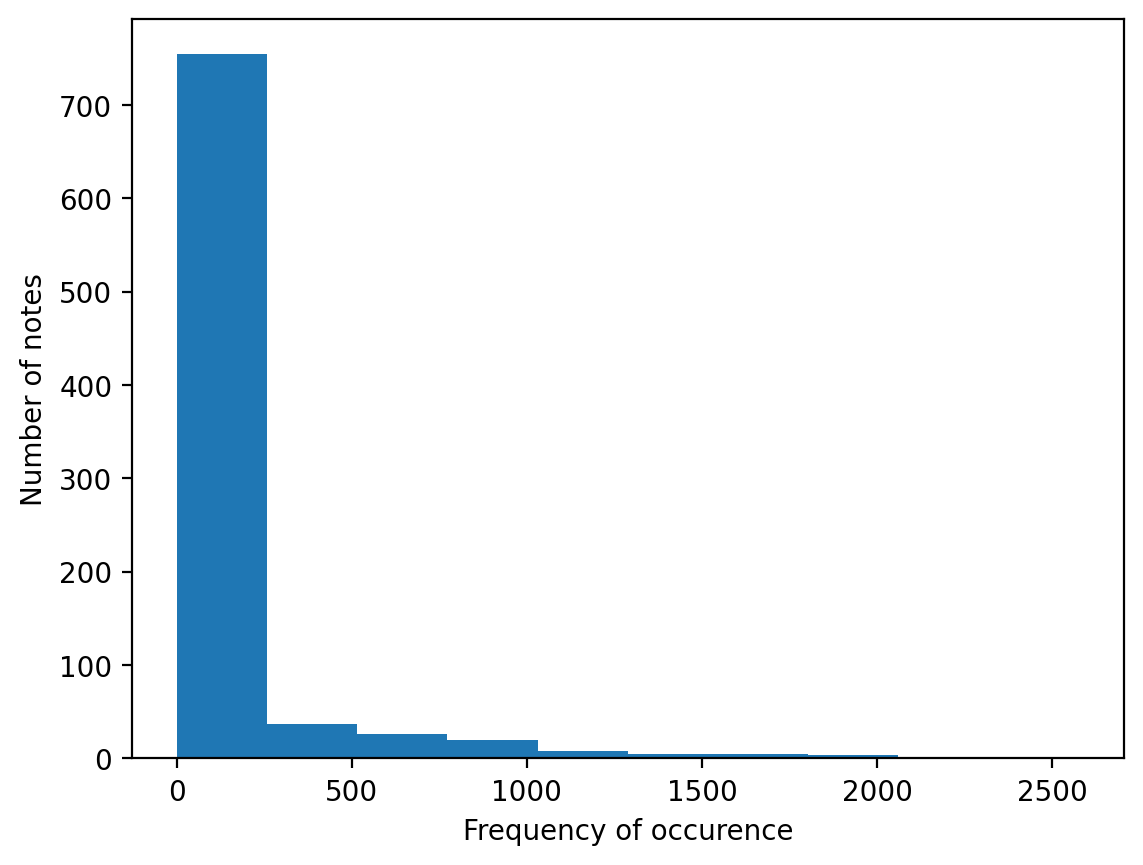

In [88]:
freq = dict(Counter(notes_))
no = [count for _, count in freq.items()]
plt.hist(no)
plt.ylabel("Number of notes")
plt.xlabel("Frequency of occurence")

In [87]:
FREQ_THRESHOLD = 40
freq_notes = [note_ for note_, count in freq.items() if count >= FREQ_THRESHOLD]
print(len(freq_notes))

188


In [7]:
new_music = []

for notes in notes_array:
    temp = []
    for note_ in notes:
        if note_ in freq_notes:
            temp.append(note_)
    new_music.append(temp)
new_music = np.array(new_music, dtype=type(new_music[0]))

In [8]:
num_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - num_timesteps):
        input_ = note_[i:i + num_timesteps]
        output_ = note_[i + num_timesteps]

        x.append(input_)
        y.append(output_)

x = np.array(x)
y = np.array(y)

In [9]:
# assign a unique integer for every note
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [10]:
# convert notes to numbers
x_seq = []
for i in x:
    temp = []

    for j in i:
        temp.append(x_note_to_int[j])

    x_seq.append(temp)
x_seq = np.array(x_seq)

In [11]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y))
y_seq = np.array([y_note_to_int[i] for i in y])

## Train Test Split

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_seq, y_seq, test_size=0.2, random_state=0)

## Model Building

In [13]:
def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  return model

In [14]:
K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           18800     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [15]:
mc = ModelCheckpoint("best_model.h5", monitor="val_loss", mode="min", save_best_only=True, verbose=1)

In [59]:
history = model.fit(np.array(x_train), np.array(y_train), batch_size=256, epochs=50, validation_data=(np.array(x_val), np.array(y_val)), verbose=1, callbacks=[mc])

Epoch 1/50
284/285 [============================>.] - ETA: 0s - loss: 1.7777
Epoch 1: val_loss did not improve from 2.08269
285/285 [==============================] - 20s 68ms/step - loss: 1.7780 - val_loss: 2.1523
Epoch 2/50
284/285 [============================>.] - ETA: 0s - loss: 1.7993
Epoch 2: val_loss did not improve from 2.08269
285/285 [==============================] - 22s 76ms/step - loss: 1.7996 - val_loss: 2.1536
Epoch 3/50
284/285 [============================>.] - ETA: 0s - loss: 1.7957
Epoch 3: val_loss did not improve from 2.08269
285/285 [==============================] - 21s 75ms/step - loss: 1.7960 - val_loss: 2.1543
Epoch 4/50
284/285 [============================>.] - ETA: 0s - loss: 1.7925
Epoch 4: val_loss did not improve from 2.08269
285/285 [==============================] - 21s 74ms/step - loss: 1.7925 - val_loss: 2.1525
Epoch 5/50
284/285 [============================>.] - ETA: 0s - loss: 1.7905
Epoch 5: val_loss did not improve from 2.08269
285/285 [=======

In [60]:
# load the best model
model = load_model("best_model.h5")

## Compose our own music

In [72]:
random_index = np.random.randint(0, len(x_val) - 1)
random_music = x_val[random_index]
predictions = []

for i in range(100):
    random_music = random_music.reshape(1, num_timesteps)
    prob = model.predict(random_music)[0]
    y_pred = np.argmax(prob, axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0], len(random_music[0]), y_pred)
    random_music = random_music[1:]

predictions

1/1 [==============================] - 0s 29ms/step


[6,
 6,
 90,
 6,
 90,
 6,
 6,
 6,
 4,
 90,
 183,
 90,
 183,
 183,
 183,
 96,
 183,
 20,
 20,
 168,
 183,
 183,
 183,
 183,
 183,
 177,
 183,
 183,
 20,
 183,
 71,
 183,
 183,
 183,
 183,
 106,
 183,
 183,
 183,
 183,
 183,
 183,
 183,
 183,
 183,
 183,
 183,
 183,
 183,
 183,
 106,
 183,
 183,
 106,
 106,
 134,
 183,
 134,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96]

In [73]:
# intergers to notes
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x))
predicted_notes = [x_int_to_note[n] for n in predictions]

In [74]:
def to_midi(prediction):
    offset = 0
    output_notes = []

    for pattern in prediction:
        # chord
        if '.' in pattern or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []

            for current_note in notes_in_chord:
                cn = int(current_note)

                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)

            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        
        # note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        offset += 1

    midi_stream = stream.Stream(output_notes)
    midi_stream.write("midi", fp="gen_music.mid")

In [75]:
to_midi(predicted_notes)

In [76]:
predicted_notes

['B3',
 'B3',
 'G2',
 'B3',
 'G2',
 'B3',
 'B3',
 'B3',
 'C3',
 'G2',
 'F2',
 'G2',
 'F2',
 'F2',
 'F2',
 '0.5',
 'F2',
 'F3',
 'F3',
 '5.9',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 '5.9.0',
 'F2',
 'F2',
 'F3',
 'F2',
 'F4',
 'F2',
 'F2',
 'F2',
 'F2',
 'C5',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 'C5',
 'F2',
 'F2',
 'C5',
 'C5',
 'B-4',
 'F2',
 'B-4',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5',
 '0.5']